<a href="https://colab.research.google.com/github/V-AISHVARYA/LGMVIP-DataScience-Task-5/blob/main/EDA_Global__Terrorism.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##LGMVIP TASK5:
**Exploratory Data Analysis on Terrorism Dataset**  
As a security/defense analyst, try to find out the hot zone of terrorism.

~Aishvarya.V


The global terrorism dataset is downloaded from [here](https://bit.ly/2TK5Xn5)

### Importing the libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import warnings
warnings.filterwarnings('ignore')

### Reading the dataset

In [ ]:
terrorism_df = pd.read_csv('globalterrorismdb_0718dist.csv', encoding='latin-1')

In [ ]:
terrorism_df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0.0,1.0,1.0,1.0,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN


#### To view the shape of the dataset

In [ ]:
print("There are {} rows and {} columns in the dataset".format(terrorism_df.shape[0],terrorism_df.shape[1]))

There are 48289 rows and 135 columns in the dataset


In [ ]:
terrorism_df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

#### Checking the uniqueness of the columns of the dataset

In [ ]:
No_of_cols=terrorism_df.columns.nunique()
print("There are total %d columns in the data"%No_of_cols)

There are total 135 columns in the data


#### Renaming the columns we are going to use for our analysis

In [ ]:
terrorism_df=terrorism_df.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','region_txt':'Region',
                             'provstate':'State','city':'City','attacktype1_txt':'Attack_type','targtype1_txt':'Target_type',
                             'targsubtype1_txt':'Target_subtype','gname':'Gang_name','weaptype1_txt':'Weapon_type'})

In [ ]:
terrorism_df.head()

,eventid,Year,Month,Day,approxdate,extended,resolution,country,Country,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0.0,1.0,1.0,1.0,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN


#### Selecting only those columns which are actually required

In [ ]:
terrorism_df=terrorism_df[['Year','Month','Day','Country','Region','State','City','Attack_type','Target_type','Target_subtype','Gang_name','Weapon_type']]

In [ ]:
terrorism_df.head()

,Year,Month,Day,Country,Region,State,City,Attack_type,Target_type,Target_subtype,Gang_name,Weapon_type
0,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,Assassination,Private Citizens & Property,Named Civilian,MANO-D,Unknown
1,1970,0,0,Mexico,North America,Federal,Mexico city,Hostage Taking (Kidnapping),Government (Diplomatic),"Diplomatic Personnel (outside of embassy, cons...",23rd of September Communist League,Unknown
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,Assassination,Journalists & Media,Radio Journalist/Staff/Facility,Unknown,Unknown
3,1970,1,0,Greece,Western Europe,Attica,Athens,Bombing/Explosion,Government (Diplomatic),Embassy/Consulate,Unknown,Explosives
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,Facility/Infrastructure Attack,Government (Diplomatic),Embassy/Consulate,Unknown,Incendiary


#### Checking the updated shape of the dataset

In [ ]:
terrorism_df.shape

(48289, 12)

#### Checking for the null values

In [ ]:
terrorism_df.isnull().sum()

Year                 0
Month                0
Day                  0
Country              0
Region               0
State              196
City                 0
Attack_type          0
Target_type          0
Target_subtype    2122
Gang_name            0
Weapon_type          0
dtype: int64

#### Filling the NaN values

In [ ]:
terrorism_df['Target_subtype'] = terrorism_df['Target_subtype'].fillna('others')

In [ ]:
terrorism_df['State']=terrorism_df['State'].fillna('Unknown')

In [ ]:
terrorism_df['City']=terrorism_df['City'].fillna('Unknown')

In [ ]:
terrorism_df.replace( {"Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)": "Vehicle"},inplace = True)

In [ ]:
terrorism_df

,Year,Month,Day,Country,Region,State,City,Attack_type,Target_type,Target_subtype,Gang_name,Weapon_type
0,1970,7,2,Dominican Republic,Central America & Caribbean,Unknown,Santo Domingo,Assassination,Private Citizens & Property,Named Civilian,MANO-D,Unknown
1,1970,0,0,Mexico,North America,Federal,Mexico city,Hostage Taking (Kidnapping),Government (Diplomatic),"Diplomatic Personnel (outside of embassy, cons...",23rd of September Communist League,Unknown
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,Assassination,Journalists & Media,Radio Journalist/Staff/Facility,Unknown,Unknown
3,1970,1,0,Greece,Western Europe,Attica,Athens,Bombing/Explosion,Government (Diplomatic),Embassy/Consulate,Unknown,Explosives
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,Facility/Infrastructure Attack,Government (Diplomatic),Embassy/Consulate,Unknown,Incendiary
...,...,...,...,...,...,...,...,...,...,...,...,...
48284,1991,9,26,Peru,South America,Lima,Lima,Bombing/Explosion,Business,Bank/Commerce,Shining Path (SL),Explosives
48285,1991,9,26,Peru,South America,Lima,Lima,Bombing/Explosion,Business,Bank/Commerce,Shining Path (SL),Explosives
48286,1991,9,26,Peru,South America,Lima,Lima,Bombing/Explosion,Business,Bank/Commerce,Shining Path (SL),Explosives
48287,1991,9,26,Peru,South America,Lima,Lima,Bombing/Explosion,Business,Bank/Commerce,Shining Path (SL),Explosives


In [ ]:
terrorism_df.shape

(48289, 12)

In [ ]:
terrorism_df.isnull().sum()

Year              0
Month             0
Day               0
Country           0
Region            0
State             0
City              0
Attack_type       0
Target_type       0
Target_subtype    0
Gang_name         0
Weapon_type       0
dtype: int64

In [ ]:
terrorism_df.head(10)

,Year,Month,Day,Country,Region,State,City,Attack_type,Target_type,Target_subtype,Gang_name,Weapon_type
0,1970,7,2,Dominican Republic,Central America & Caribbean,Unknown,Santo Domingo,Assassination,Private Citizens & Property,Named Civilian,MANO-D,Unknown
1,1970,0,0,Mexico,North America,Federal,Mexico city,Hostage Taking (Kidnapping),Government (Diplomatic),"Diplomatic Personnel (outside of embassy, cons...",23rd of September Communist League,Unknown
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,Assassination,Journalists & Media,Radio Journalist/Staff/Facility,Unknown,Unknown
3,1970,1,0,Greece,Western Europe,Attica,Athens,Bombing/Explosion,Government (Diplomatic),Embassy/Consulate,Unknown,Explosives
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,Facility/Infrastructure Attack,Government (Diplomatic),Embassy/Consulate,Unknown,Incendiary
5,1970,1,1,United States,North America,Illinois,Cairo,Armed Assault,Police,"Police Building (headquarters, station, school)",Black Nationalists,Firearms
6,1970,1,2,Uruguay,South America,Montevideo,Montevideo,Assassination,Police,Police Security Forces/Officers,Tupamaros (Uruguay),Firearms
7,1970,1,2,United States,North America,California,Oakland,Bombing/Explosion,Utilities,Electricity,Unknown,Explosives
8,1970,1,2,United States,North America,Wisconsin,Madison,Facility/Infrastructure Attack,Military,Military Recruiting Station/Academy,New Year's Gang,Incendiary
9,1970,1,3,United States,North America,Wisconsin,Madison,Facility/Infrastructure Attack,Government (General),Government Building/Facility/Office,New Year's Gang,Incendiary


In [ ]:
terrorism_df.columns.unique()

Index(['Year', 'Month', 'Day', 'Country', 'Region', 'State', 'City',
       'Attack_type', 'Target_type', 'Target_subtype', 'Gang_name',
       'Weapon_type'],
      dtype='object')

In [ ]:
terrorism_df.columns.nunique()

12

In [ ]:
Total_countries=terrorism_df['Country'].nunique()
print("Total %d countries were noted in the data"%Total_countries)

Total 158 countries were noted in the data


In [ ]:
print(terrorism_df['Region'].unique())

['Central America & Caribbean' 'North America' 'Southeast Asia'
 'Western Europe' 'East Asia' 'South America' 'Eastern Europe'
 'Sub-Saharan Africa' 'Middle East & North Africa' 'Australasia & Oceania'
 'South Asia' 'Central Asia']


In [ ]:
print(terrorism_df['Attack_type'].unique())

['Assassination' 'Hostage Taking (Kidnapping)' 'Bombing/Explosion'
 'Facility/Infrastructure Attack' 'Armed Assault' 'Hijacking' 'Unknown'
 'Unarmed Assault' 'Hostage Taking (Barricade Incident)']


In [ ]:
print(terrorism_df['Target_type'].unique())

['Private Citizens & Property' 'Government (Diplomatic)'
 'Journalists & Media' 'Police' 'Utilities' 'Military'
 'Government (General)' 'Airports & Aircraft' 'Business'
 'Educational Institution' 'Violent Political Party'
 'Religious Figures/Institutions' 'Unknown' 'Transportation' 'Tourists'
 'NGO' 'Telecommunication' 'Food or Water Supply'
 'Terrorists/Non-State Militia' 'Other' 'Maritime' 'Abortion Related']


In [ ]:
print(terrorism_df['Gang_name'].unique())

['MANO-D' '23rd of September Communist League' 'Unknown' ...
 'Kashmiri Hezbollah' 'Karenni National Progressive Party'
 'Mahaz-e-Milli Islami Afghanistan']


In [ ]:
print(terrorism_df['Gang_name'].nunique())

1598


In [ ]:
print(terrorism_df['Weapon_type'].unique())

['Unknown' 'Explosives' 'Incendiary' 'Firearms' 'Chemical' 'Melee'
 'Sabotage Equipment' 'Vehicle' 'Fake Weapons' 'Radiological' 'Other'
 'Biological']


In [ ]:
terrorism_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48289 entries, 0 to 48288
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Year            48289 non-null  int64 
 1   Month           48289 non-null  int64 
 2   Day             48289 non-null  int64 
 3   Country         48289 non-null  object
 4   Region          48289 non-null  object
 5   State           48289 non-null  object
 6   City            48289 non-null  object
 7   Attack_type     48289 non-null  object
 8   Target_type     48289 non-null  object
 9   Target_subtype  48289 non-null  object
 10  Gang_name       48289 non-null  object
 11  Weapon_type     48289 non-null  object
dtypes: int64(3), object(9)
memory usage: 4.4+ MB


In [ ]:
terrorism_df.describe()

,Year,Month,Day
count,48289.000000,48289.000000,48289.000000
mean,1983.919920,6.327383,15.339042
std,5.192001,3.345662,8.836716
min,1970.000000,0.000000,0.000000
25%,1980.000000,3.000000,8.000000
50%,1985.000000,6.000000,15.000000
75%,1988.000000,9.000000,23.000000
max,1991.000000,12.000000,31.000000


In [ ]:
terrorism_df['Country'].value_counts().head(10)

Peru              5235
El Salvador       5106
Colombia          4055
United Kingdom    3241
Spain             2428
Chile             2064
United States     2052
India             1856
Nicaragua         1830
Guatemala         1757
Name: Country, dtype: int64

In [ ]:
terrorism_df['Region'].value_counts().head(10)

South America                  12792
Western Europe                 10336
Central America & Caribbean     9236
Middle East & North Africa      4877
South Asia                      3993
Sub-Saharan Africa              2414
North America                   2226
Southeast Asia                  1784
East Asia                        308
Eastern Europe                   200
Name: Region, dtype: int64

In [ ]:
terrorism_df['State'].value_counts().head(10)

Northern Ireland         2865
Unknown                  2581
Lima                     2146
San Salvador             1859
Santiago Metropolitan    1427
Basque Country            993
Antioquia                 991
Ayacucho                  968
Punjab                    874
Beirut                    836
Name: State, dtype: int64

In [ ]:
terrorism_df['Target_subtype'].value_counts().head(10)

Military Unit/Patrol/Convoy                             3965
Electricity                                             2740
Police Security Forces/Officers                         2571
Politician or Political Party Movement/Meeting/Rally    2150
others                                                  2122
Government Building/Facility/Office                     2067
Bank/Commerce                                           1905
Village/City/Town/Suburb                                1841
Police Building (headquarters, station, school)         1650
Retail/Grocery/Bakery                                   1573
Name: Target_subtype, dtype: int64

In [ ]:
terrorism_df['City'].value_counts().head(10)

Unknown           2947
Lima              1923
San Salvador      1505
Santiago          1403
Belfast           1402
Beirut             831
Bogota             667
Guatemala City     610
Medellin           538
Paris              519
Name: City, dtype: int64

In [ ]:
terrorism_df['Attack_type'].value_counts().head(10)

Bombing/Explosion                      21713
Armed Assault                          10865
Assassination                           8558
Facility/Infrastructure Attack          3048
Hostage Taking (Kidnapping)             1977
Unknown                                 1316
Hostage Taking (Barricade Incident)      532
Hijacking                                197
Unarmed Assault                           83
Name: Attack_type, dtype: int64

In [ ]:
terrorism_df['Target_type'].value_counts().head(10)

Business                       8488
Private Citizens & Property    7895
Military                       7492
Government (General)           6151
Police                         5289
Utilities                      3125
Transportation                 2369
Government (Diplomatic)        1706
Journalists & Media            1091
Educational Institution         980
Name: Target_type, dtype: int64

In [ ]:
terrorism_df['Gang_name'].value_counts().head(10)

Unknown                                             14501
Shining Path (SL)                                    3926
Farabundo Marti National Liberation Front (FMLN)     3196
Irish Republican Army (IRA)                          2175
Basque Fatherland and Freedom (ETA)                  1550
Nicaraguan Democratic Force (FDN)                     895
New People's Army (NPA)                               856
Palestinians                                          827
Manuel Rodriguez Patriotic Front (FPMR)               799
Revolutionary Armed Forces of Colombia (FARC)         775
Name: Gang_name, dtype: int64

In [ ]:
terrorism_df['Weapon_type'].value_counts().head(5)

Explosives    21804
Firearms      18196
Unknown        4069
Incendiary     3616
Melee           470
Name: Weapon_type, dtype: int64

### Visualizing the dataset

#### Attack by weapons type

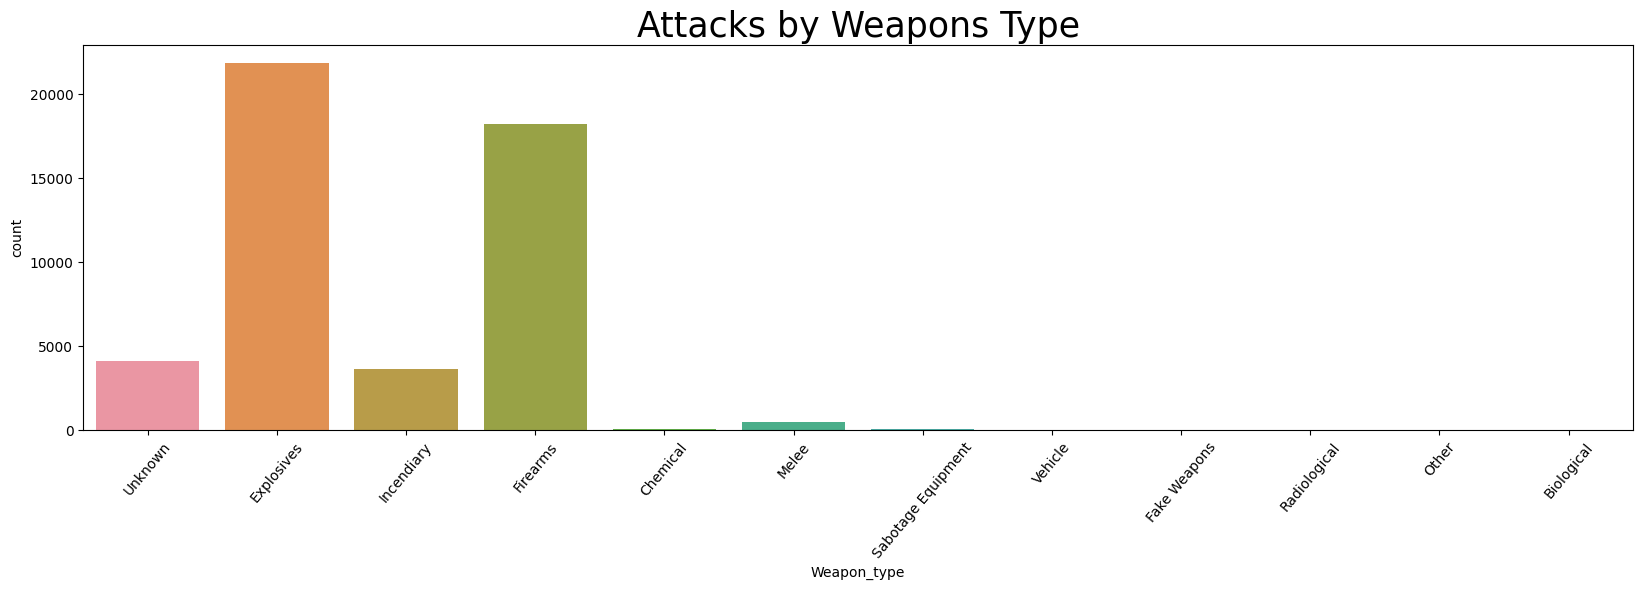

In [ ]:
plt.figure(figsize=(20,5));
plt.xticks(rotation = 50)
plt.title('Attacks by Weapons Type', fontsize = 25)
sns.countplot(x=terrorism_df.Weapon_type);

#### Attacks by year

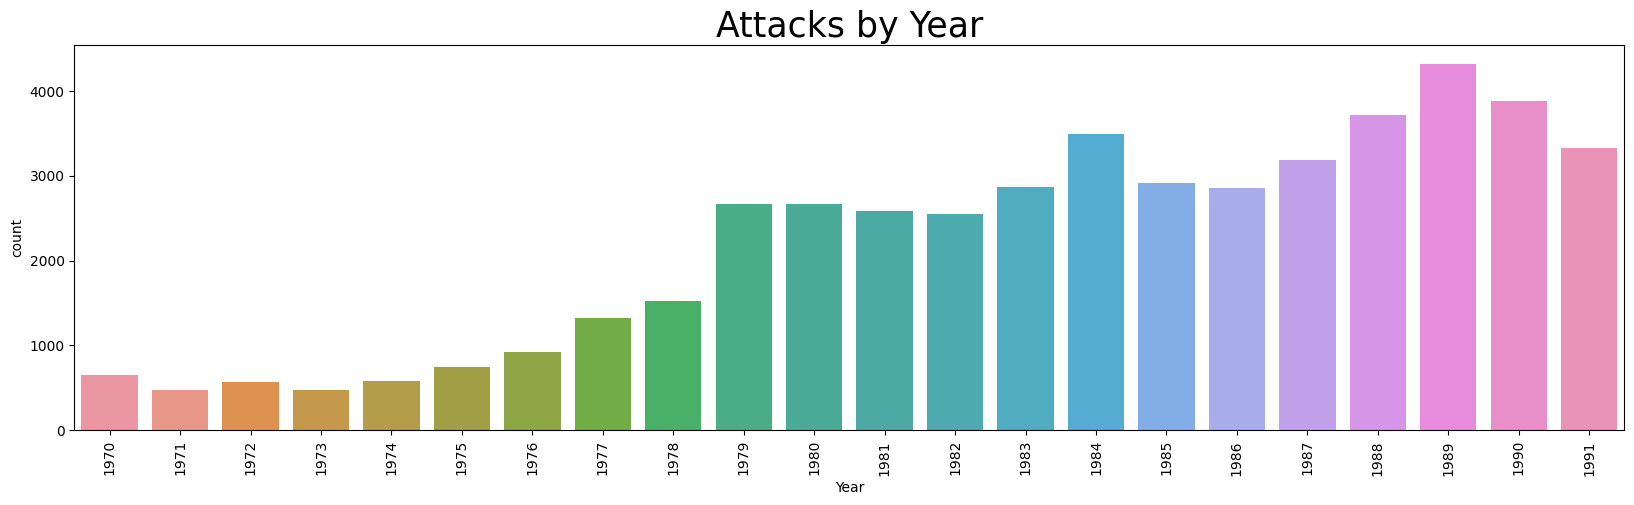

In [ ]:
plt.figure(figsize=(20,5));
plt.xticks(rotation = 90)
plt.title('Attacks by Year', fontsize = 25)
sns.countplot(x=terrorism_df.Year);

#### Attacks by month

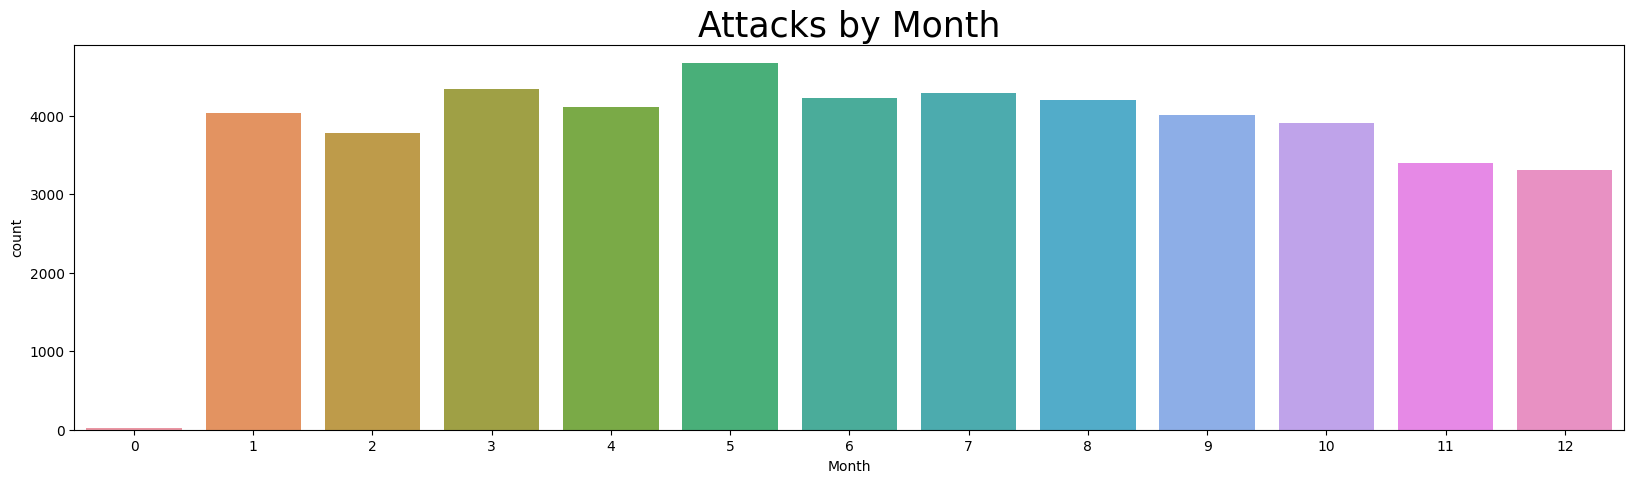

In [ ]:
plt.figure(figsize=(20,5));
plt.title('Attacks by Month', fontsize = 25)
sns.countplot(x=terrorism_df.Month);

#### Attacks by day

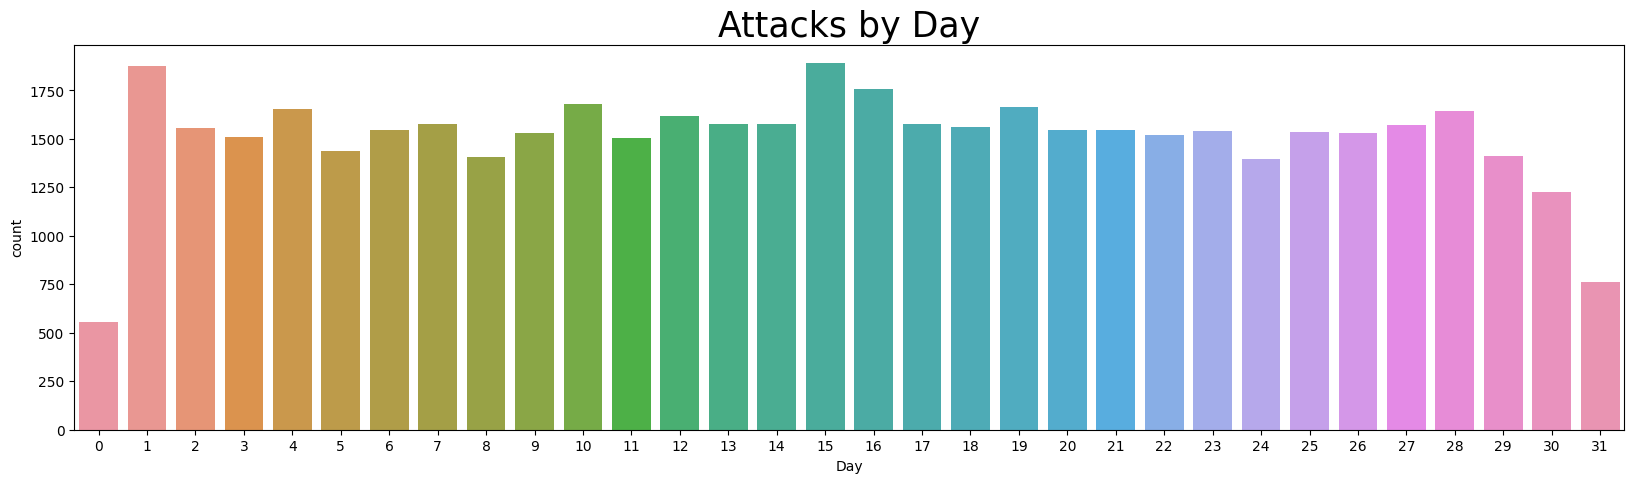

In [ ]:
plt.figure(figsize=(20,5));
plt.title('Attacks by Day', fontsize = 25)
sns.countplot(x=terrorism_df.Day);

#### Cities with most attacks

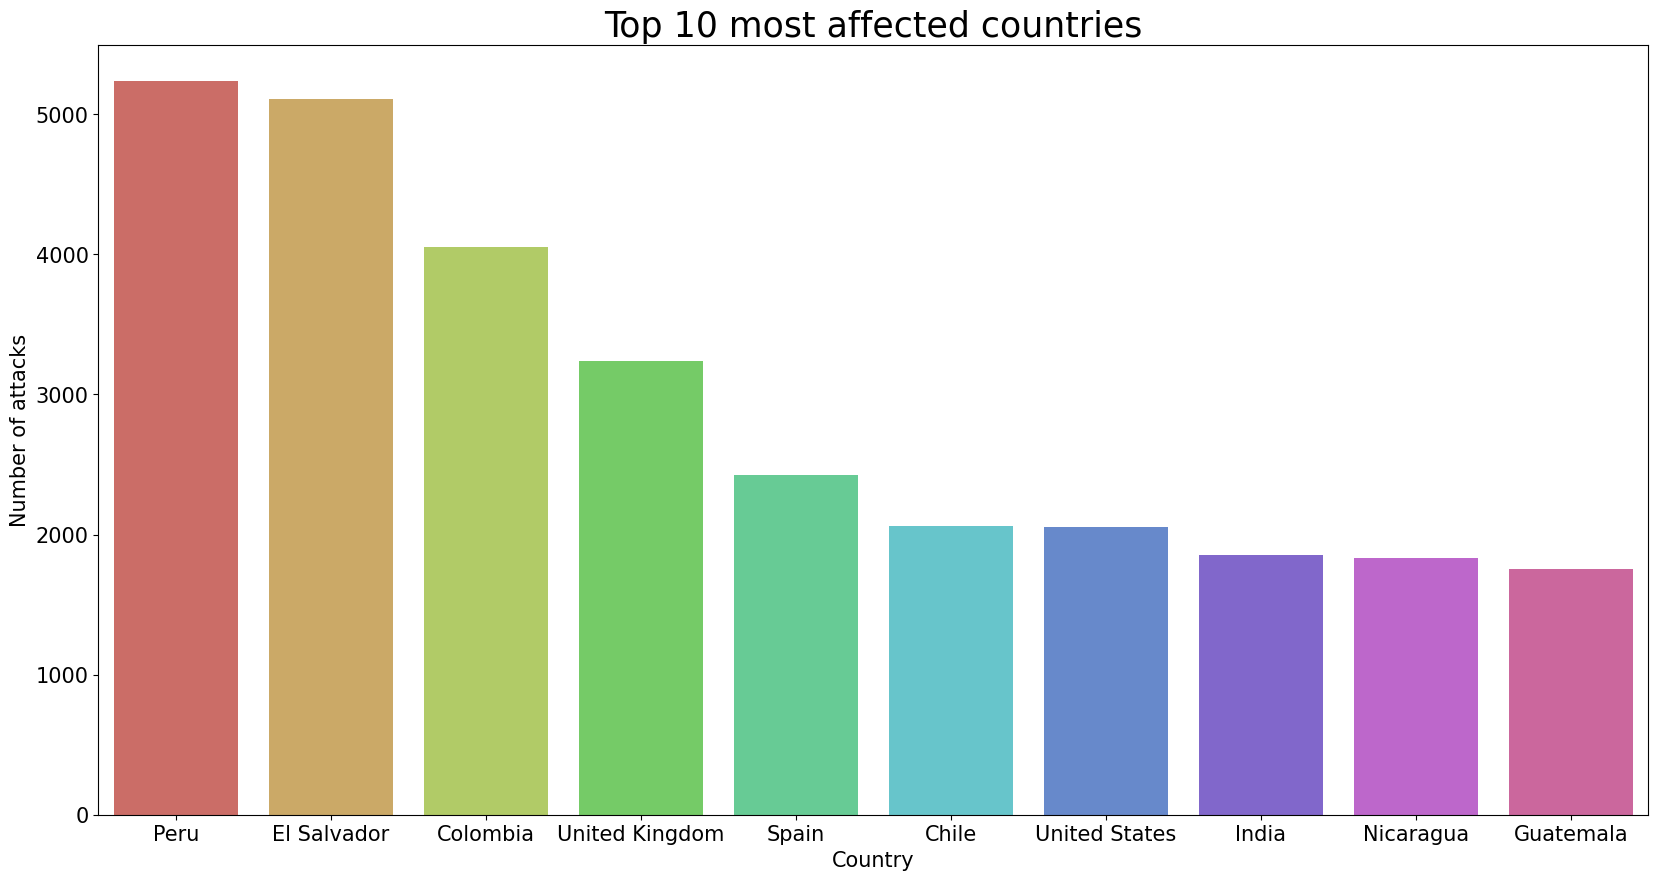

In [ ]:
plt.subplots(figsize=(20,10))
sns.barplot(x=terrorism_df['Country'].value_counts()[:10].index,y=terrorism_df['Country'].value_counts()[:10].values,palette='hls')
plt.title('Top 10 most affected countries', fontsize =25)
plt.xlabel('Country')
plt.ylabel('Number of attacks')
plt.xticks(rotation = 0)
plt.show()

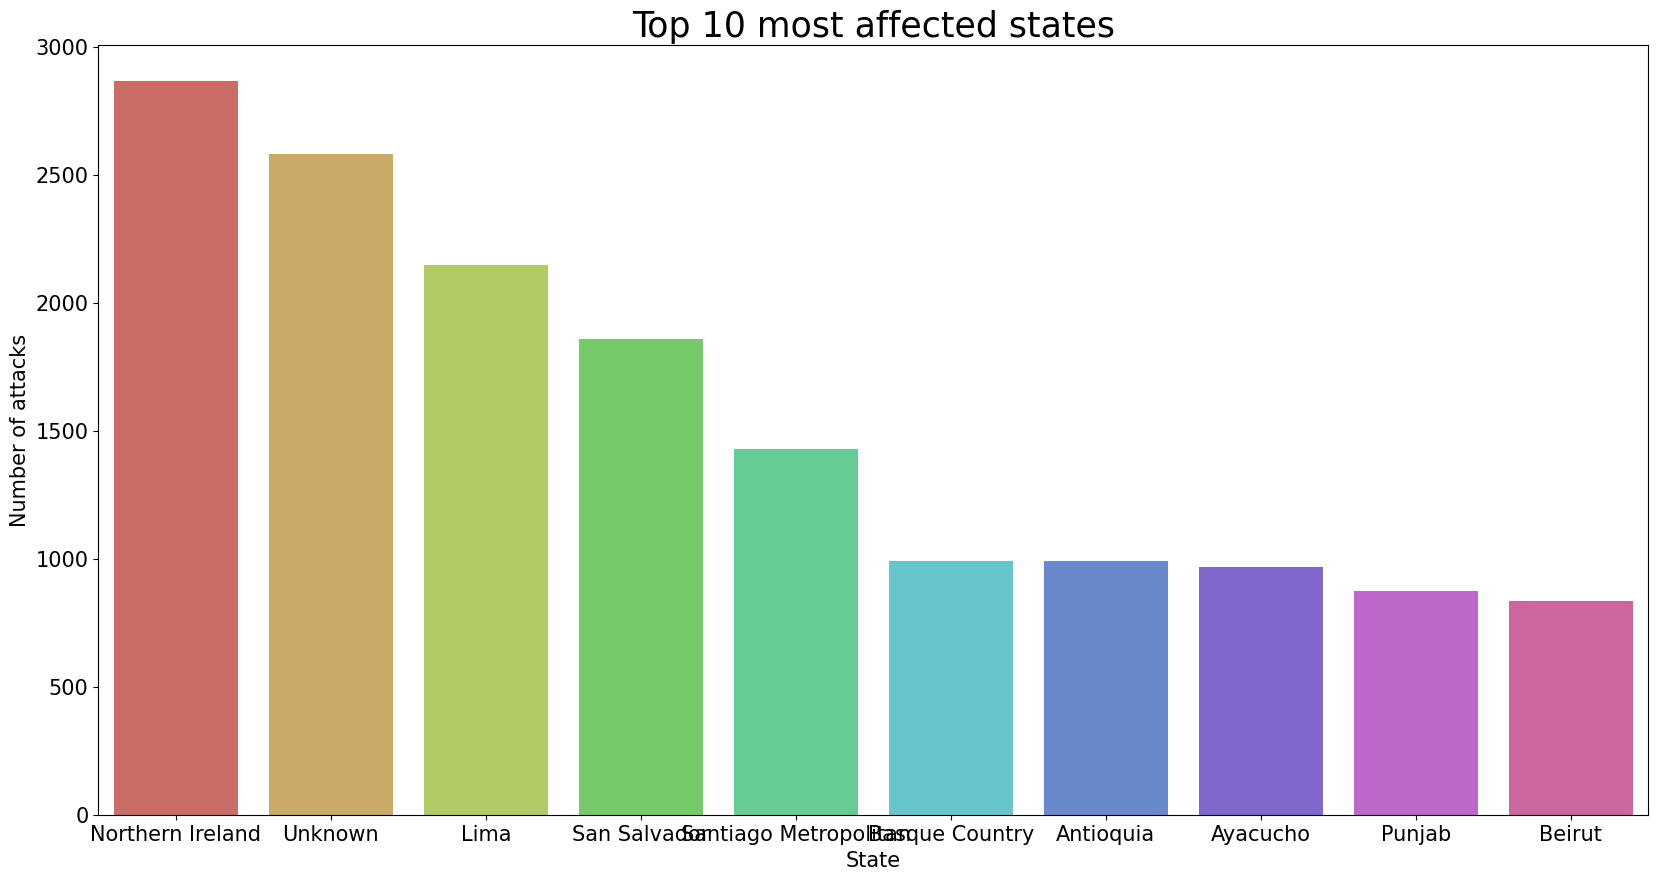

In [ ]:
plt.subplots(figsize=(20,10))
sns.barplot(x=terrorism_df['State'].value_counts()[:10].index,y=terrorism_df['State'].value_counts()[:10].values,palette='hls')
plt.title('Top 10 most affected states', fontsize =25)
plt.xlabel('State')
plt.ylabel('Number of attacks')
plt.xticks(rotation = 0)
plt.show()

#### Attacks by region

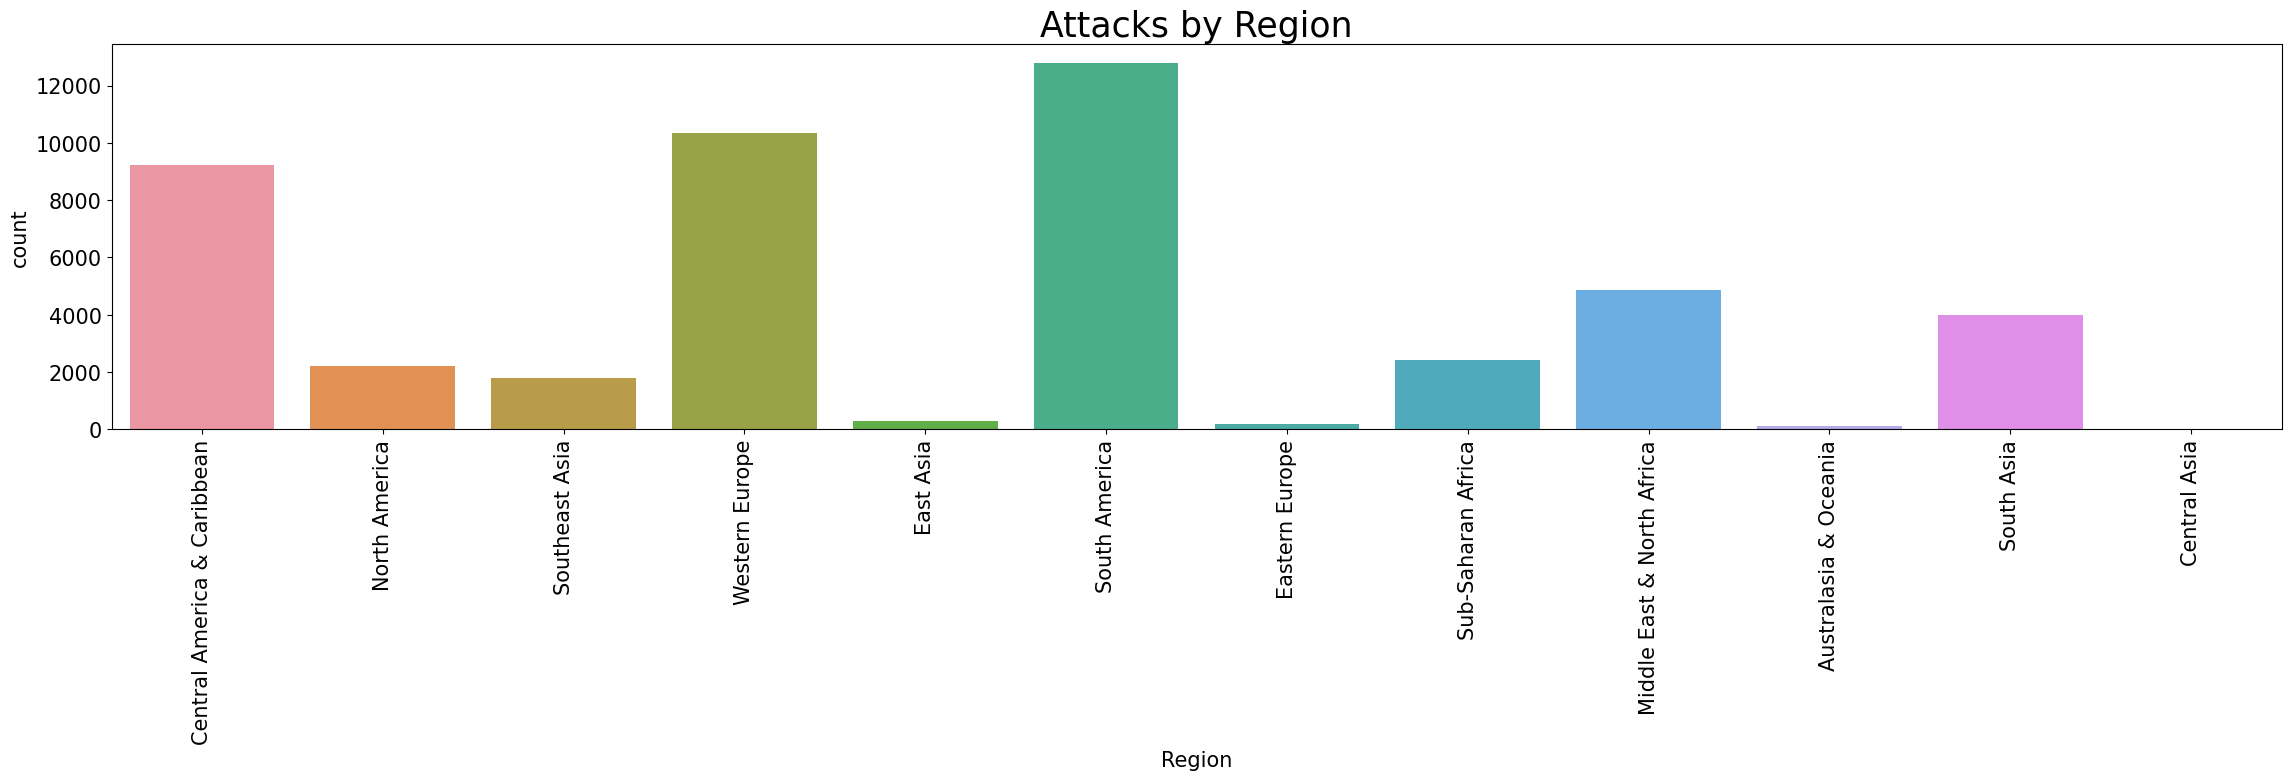

In [ ]:
plt.figure(figsize=(28,5));
plt.rcParams.update({'font.size':15});
plt.xticks(rotation ="vertical")
plt.title('Attacks by Region', fontsize =25)
sns.countplot(x=terrorism_df.Region);

#### Attack based on target type

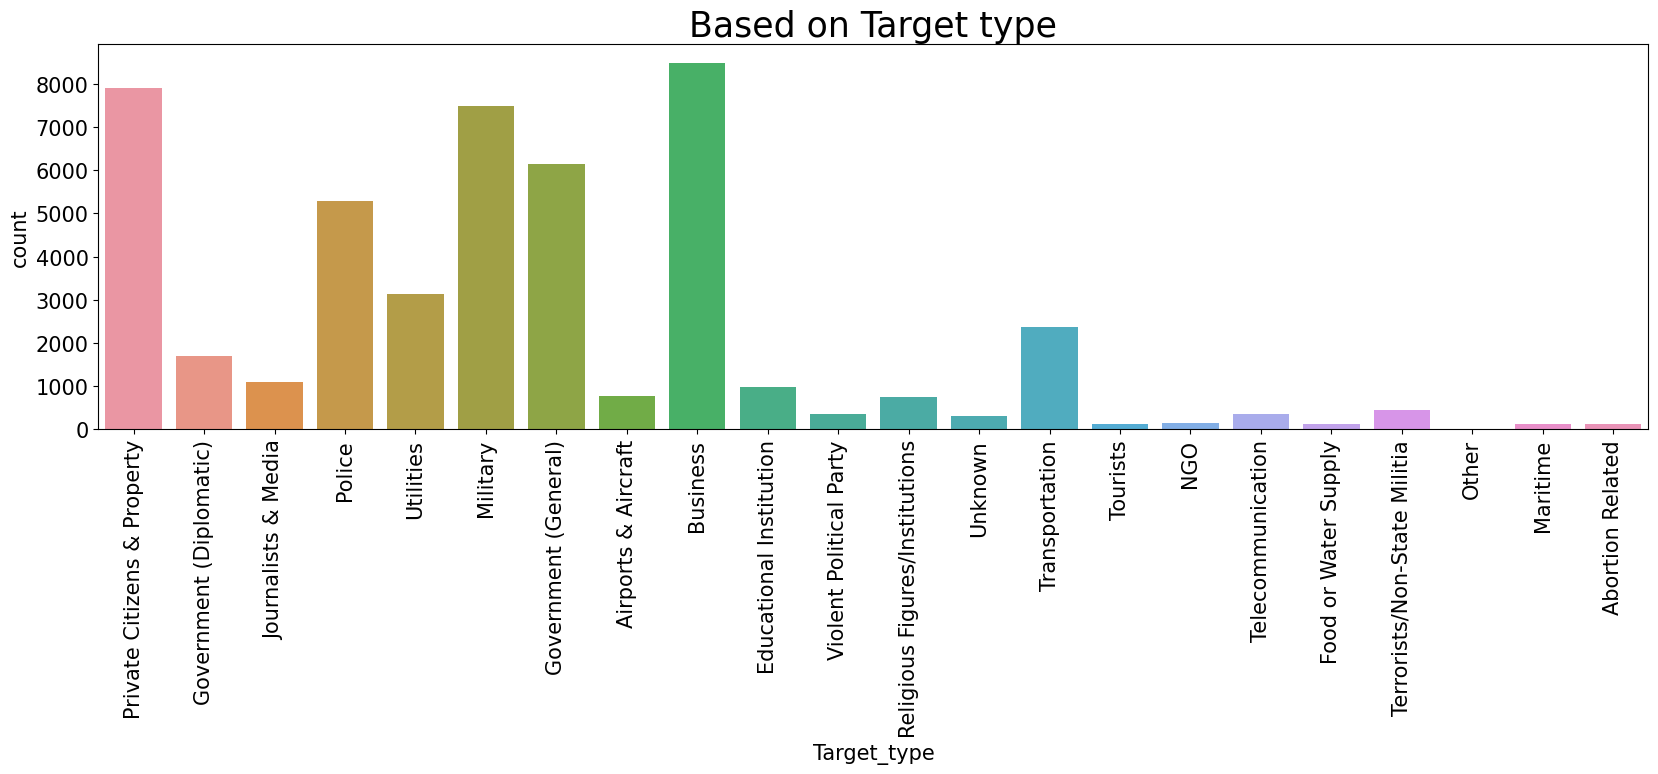

In [ ]:
plt.figure(figsize=(20,5));
plt.rcParams.update({'font.size':15});
plt.xticks(rotation = 90)
plt.title('Based on Target type', fontsize =25)
sns.countplot(x=terrorism_df.Target_type);

#### Attacks based on attack type

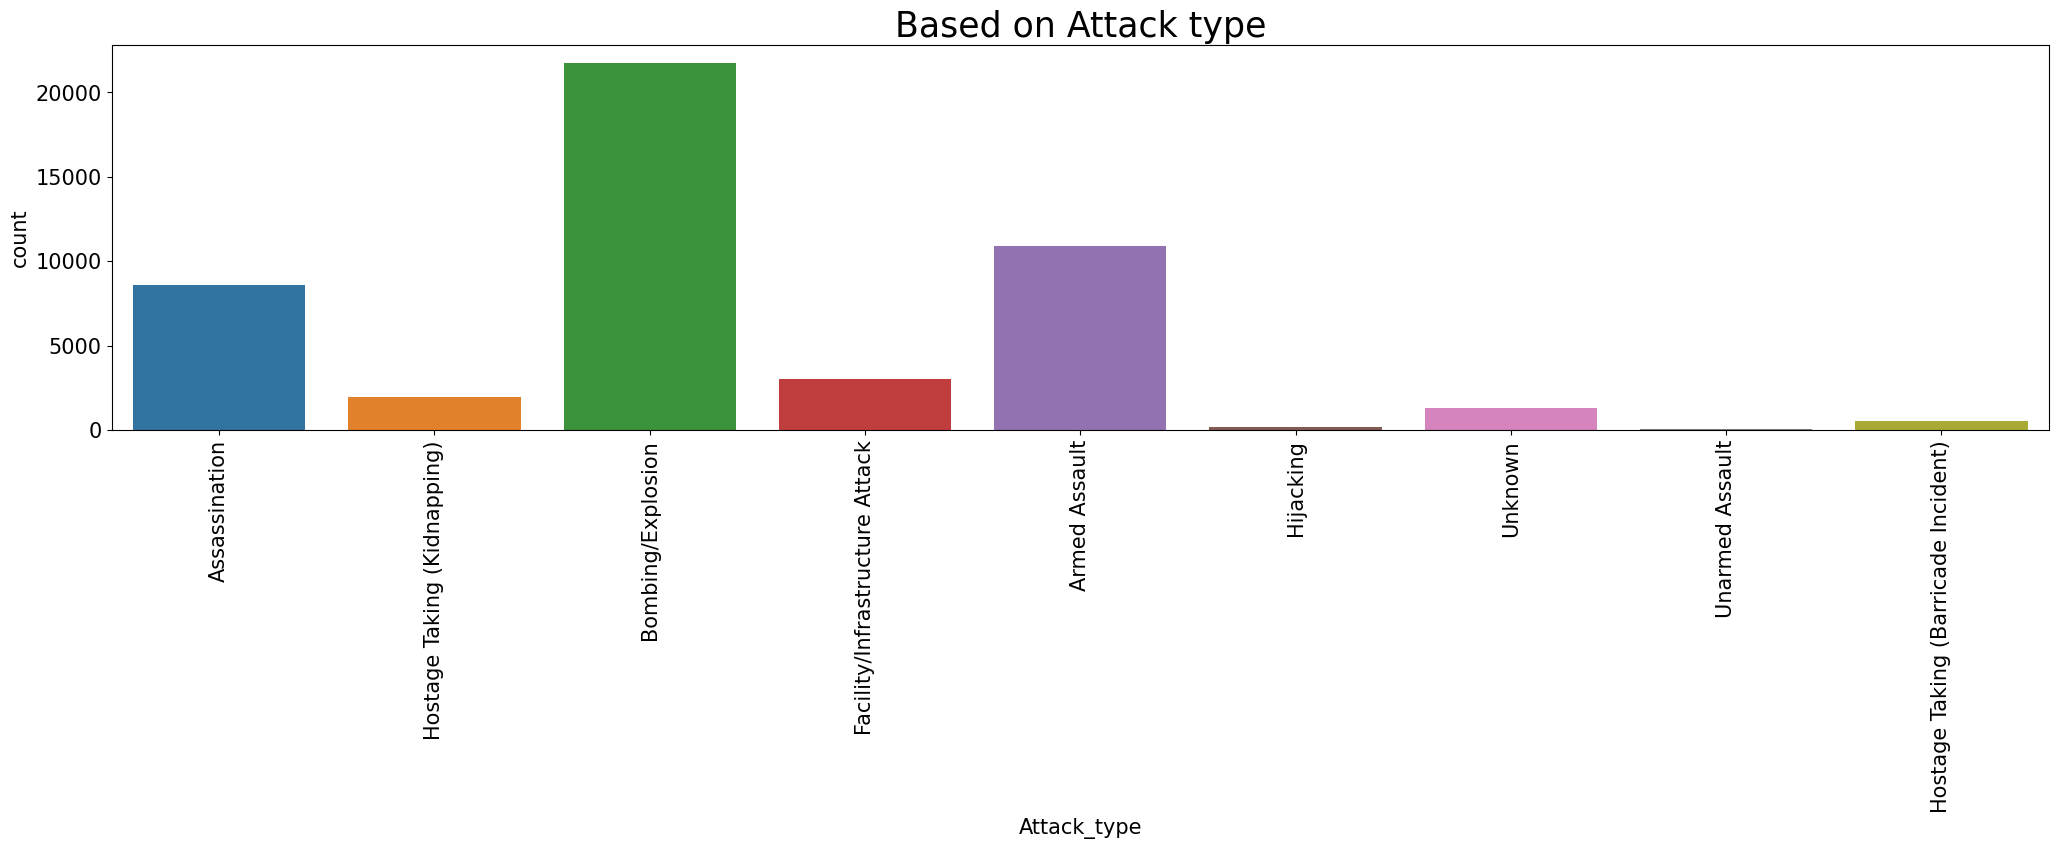

In [ ]:
plt.figure(figsize=(25,5));
plt.rcParams.update({'font.size':15});
plt.xticks(rotation = 90)
plt.title('Based on Attack type', fontsize = 25)
sns.countplot(x=terrorism_df.Attack_type);

Thank you!: